shape: (5, 2)
┌───────────┬────────┐
│ smiles    ┆ tg     │
│ ---       ┆ ---    │
│ str       ┆ f64    │
╞═══════════╪════════╡
│ *C*       ┆ -120.0 │
│ *CC*      ┆ -120.0 │
│ *CC(*)C   ┆ -3.0   │
│ *CC(*)CC  ┆ -24.1  │
│ *CC(*)CCC ┆ -37.0  │
└───────────┴────────┘
2024-04-25 13:31:12 | INFO |    OS: Windows


Seed set to 1


2024-04-25 13:31:12 | INFO |    precision is 32
2024-04-25 13:31:12 | INFO |    ***Sampling and splitting of the dataset.***
2024-04-25 13:31:12 | INFO |    Train/valid/test splits:0.80/0.10/0.10
2024-04-25 13:31:12 | INFO |    Setup Polymer Tokens.
2024-04-25 13:31:12 | INFO |    ***No data augmentation has been required.***
2024-04-25 13:31:12 | INFO |    SMILES data size:
2024-04-25 13:31:23 | INFO |    	Training set   | 5356
2024-04-25 13:31:23 | INFO |    	Validation set | 670
2024-04-25 13:31:23 | INFO |    	Test set       | 670


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./outputs/Tg\test\bayes_opt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 2.2 K 
---------------------------------------------------
2.2 K     Trainable params
0         Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 41/41 [00:00<00:00, 55.09it/s, loss=0.073, val_loss=0.059, val_r2=0.334]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-25 13:31:42 | INFO |    Trial 0 finished with value: 0.05851157382130623 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 3, 'n_dense_dim': 4, 'drop_rate': 0.0, 'learning_rate': 0.00018924123965722266}. Best is trial 0 with value: 0.05851157382130623 and R2: 0.3342466354370117.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 3.3 K 
---------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 41/41 [00:00<00:00, 87.63it/s, loss=0.018, val_loss=0.015, val_r2=0.824]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-25 13:31:56 | INFO |    Trial 1 finished with value: 0.015428354032337666 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 2, 'n_graph_dim': 4, 'n_dense_dim': 5, 'drop_rate': 0.1, 'learning_rate': 0.011367330868956235}. Best is trial 1 with value: 0.015428354032337666 and R2: 0.8244538903236389.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 18.9 K
---------------------------------------------------
18.9 K    Trainable params
0         Non-trainable params
18.9 K    Total params
0.075     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 41/41 [00:00<00:00, 63.07it/s, loss=0.022, val_loss=0.018, val_r2=0.795]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-25 13:32:12 | INFO |    Trial 2 finished with value: 0.018038000911474228 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 6, 'drop_rate': 0.1, 'learning_rate': 0.0047431786810463224}. Best is trial 1 with value: 0.015428354032337666 and R2: 0.8244538903236389.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 29.2 K
---------------------------------------------------
29.2 K    Trainable params
0         Non-trainable params
29.2 K    Total params
0.117     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 41/41 [00:00<00:00, 69.39it/s, loss=0.018, val_loss=0.015, val_r2=0.827]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-25 13:32:28 | INFO |    Trial 3 finished with value: 0.015248524956405163 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 1, 'n_graph_dim': 7, 'n_dense_dim': 7, 'drop_rate': 0.1, 'learning_rate': 0.011938997108268644}. Best is trial 3 with value: 0.015248524956405163 and R2: 0.8265000581741333.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 1.9 K 
---------------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.008     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 41/41 [00:01<00:00, 40.17it/s, loss=0.018, val_loss=0.016, val_r2=0.814]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-25 13:32:48 | INFO |    Trial 4 finished with value: 0.016358856111764908 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.0, 'learning_rate': 0.04309506204261084}. Best is trial 3 with value: 0.015248524956405163 and R2: 0.8265000581741333.
2024-04-25 13:32:48 | INFO |    Best Trial: 3 with MSE value: 0.015248524956405163
2024-04-25 13:32:48 | INFO |    Best Params
2024-04-25 13:32:48 | INFO |    Conv hidden layers  |1
2024-04-25 13:32:48 | INFO |    Dense hidden layers |1
2024-04-25 13:32:48 | INFO |    Graph dim           |128
2024-04-25 13:32:48 | INFO |    Dense dim           |128
2024-04-25 13:32:48 | INFO |    Drop rate           |0.1
2024-04-25 13:32:48 | INFO |    learning rate       |0.011938997108268644
2024-04-25 13:32:48 | INFO |    
2024-04-25 13:32:48 | INFO |    ***Training of the best model.***


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./outputs/Tg\test\training
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGAT     | 29.2 K
---------------------------------------------------
29.2 K    Trainable params
0         Non-trainable params
29.2 K    Total params
0.117     Total estimated model params size (MB)
Epoch 20: 100%|██████████| 41/41 [00:00<00:00, 68.36it/s, loss=0.015, val_loss=0.014, val_r2=0.843]
`Trainer.fit` stopped: `max_epochs=20` reached.


2024-04-25 13:33:10 | INFO |    Training Finished!!!
2024-04-25 13:33:10 | INFO |    Best val_loss @ Epoch #19
2024-04-25 13:33:10 | INFO |    ***Predictions from the best model.***
2024-04-25 13:33:15 | INFO |    For the training set:
2024-04-25 13:33:15 | INFO |    MAE: 29.9777 RMSE: 41.2262 R^2: 0.8595
2024-04-25 13:33:15 | INFO |    For the validation set:
2024-04-25 13:33:15 | INFO |    MAE: 29.7676 RMSE: 43.0068 R^2: 0.8297
2024-04-25 13:33:15 | INFO |    For the test set:
2024-04-25 13:33:15 | INFO |    MAE: 33.8062 RMSE: 46.6882 R^2: 0.8304


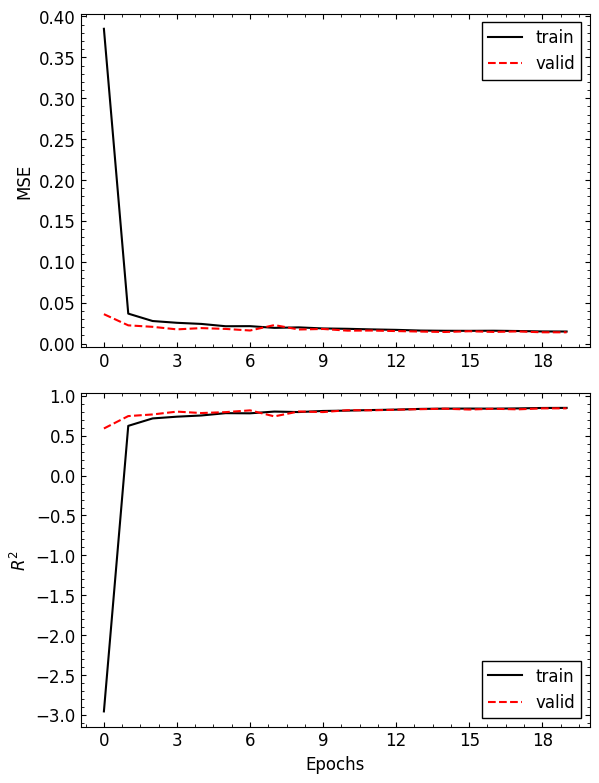

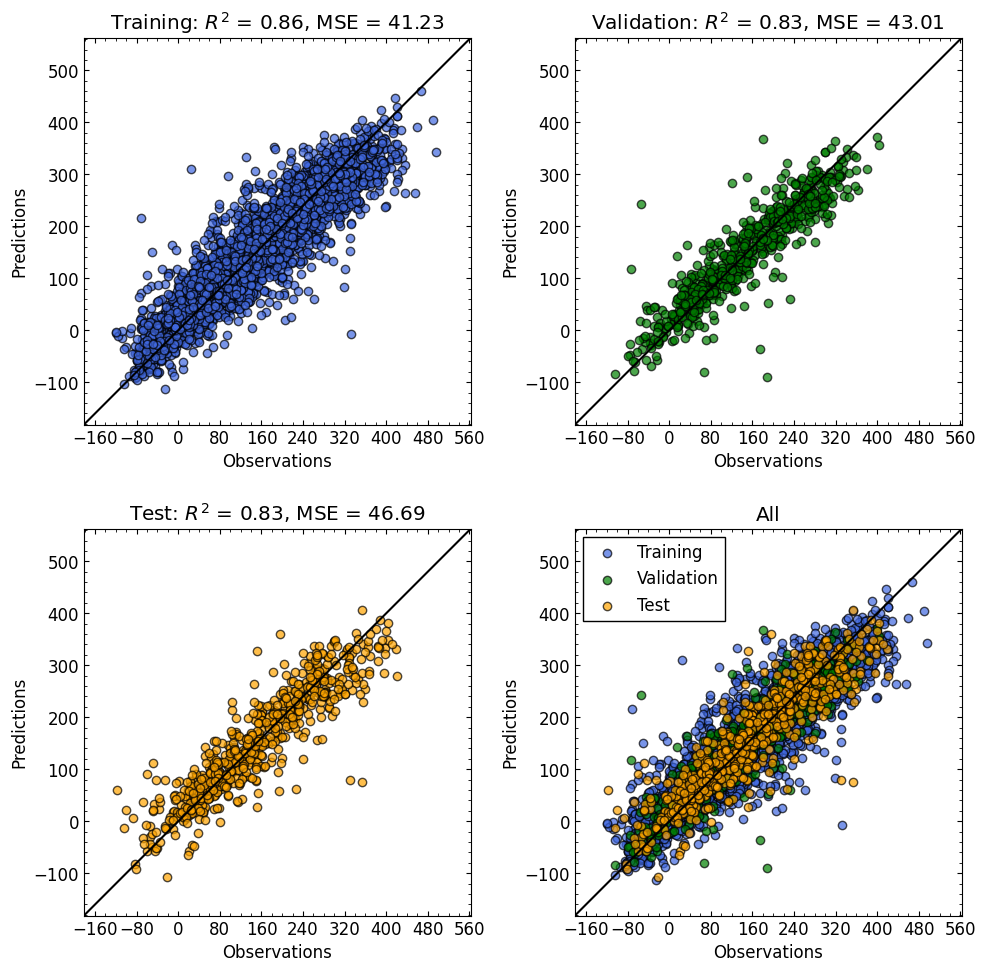

In [1]:
import os
from molecular_gnn import train

data_name = "test"
config_filepath = os.path.join("configs", f"{data_name}.yaml")
train.main(config_filepath=config_filepath)